# Bitcoin Zaman Serisi Analizi

* Gerekli kütüphanelerin kurulması

In [ ]:
pip install pandas 


In [ ]:
pip install numpy matplotlib seaborn plotly 

In [ ]:
pip install jupyter scikit-learn statsmodels yfinance

In [75]:
import seaborn as sns


* Keşifsel veri analizi

In [76]:
import pandas as pd

df = pd.read_csv("data/btc_1d_data_2018_to_2025.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2700 non-null   object 
 1   Open                          2700 non-null   float64
 2   High                          2700 non-null   float64
 3   Low                           2700 non-null   float64
 4   Close                         2700 non-null   float64
 5   Volume                        2700 non-null   float64
 6   Close time                    2700 non-null   object 
 7   Quote asset volume            2700 non-null   float64
 8   Number of trades              2700 non-null   int64  
 9   Taker buy base asset volume   2700 non-null   float64
 10  Taker buy quote asset volume  2700 non-null   float64
 11  Ignore                        2700 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 253.3+ KB


Dikkat Edilmesi Gerekenler
Open time ve Close time sütunları şu an object (string) tipinde, bunları datetime tipine çevirmelisin.

Ignore sütunu büyük ihtimalle işine yaramaz bunu çıkartmalıyız.

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2.700000e+03,2.700000e+03,2700.000000,2.700000e+03,2700.0
mean,31492.678493,32178.673726,30759.397378,31523.044937,68310.697764,1.769120e+09,1.707199e+06,33955.470304,8.759912e+08,0.0
std,26077.402717,26518.747208,25621.965938,26102.825054,79894.081170,1.999387e+09,2.103979e+06,39758.699543,9.940853e+08,0.0
min,3211.710000,3276.500000,3156.260000,3211.720000,300.986860,1.177017e+07,1.241700e+04,151.876190,6.532639e+06,0.0
25%,9203.042500,9376.830000,8981.675000,9203.042500,28444.667668,3.587383e+08,3.956268e+05,14243.066352,1.813777e+08,0.0
50%,23936.645000,24549.795000,23467.925000,23947.125000,43681.327938,1.059653e+09,9.926025e+05,21811.092690,5.179676e+08,0.0
75%,46956.735000,48155.000000,45609.545000,46976.092500,71155.137407,2.487150e+09,1.893604e+06,35384.207525,1.244527e+09,0.0
max,111696.220000,111800.000000,111201.860000,111340.180000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


In [9]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [10]:
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2695,2025-05-19,106454.27,107108.62,104742.53,105140.00,3542.14220,2025-05-19 23:59:59.999,3.751447e+08,736569,1937.64636,2.053688e+08,0
2696,2025-05-20,105573.73,106789.58,105554.31,106577.64,3349.44430,2025-05-20 23:59:59.999,3.554848e+08,527844,1911.06311,2.028472e+08,0
2697,2025-05-21,106850.00,107206.94,106400.00,106400.00,1252.62742,2025-05-21 23:59:59.999,1.337861e+08,337467,518.63094,5.540490e+07,0
2698,2025-05-22,109643.99,110576.70,109177.37,109945.54,3967.13002,2025-05-22 23:59:59.999,4.361191e+08,751982,2172.88802,2.389061e+08,0
2699,2025-05-23,111696.22,111800.00,111201.86,111340.18,1702.14192,2025-05-23 23:59:59.999,1.897412e+08,373745,912.13208,1.016736e+08,0


* Veri Temizleme ve Dönüşümleri

Yapılacaklar:
Tarih sütunlarını (Open time, Close time) datetime formatına çevir.

Ignore sütununu veri setinden kaldır.

In [11]:
# 1. Tarih sütunlarını datetime yap
df['Open time'] = pd.to_datetime(df['Open time'])
df['Close time'] = pd.to_datetime(df['Close time'])


In [12]:
# 2. Ignore sütununu kaldır
df = df.drop(columns=['Ignore'])

* Temizlenmiş ve düzenlenmiş veriyi tekrar incele

In [13]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     2700 non-null   datetime64[ns]
 1   Open                          2700 non-null   float64       
 2   High                          2700 non-null   float64       
 3   Low                           2700 non-null   float64       
 4   Close                         2700 non-null   float64       
 5   Volume                        2700 non-null   float64       
 6   Close time                    2700 non-null   datetime64[ns]
 7   Quote asset volume            2700 non-null   float64       
 8   Number of trades              2700 non-null   int64         
 9   Taker buy base asset volume   2700 non-null   float64       
 10  Taker buy quote asset volume  2700 non-null   float64       
dtypes: datetime64[ns](2), float64(

* Veriseti Görselleştirmeleri

In [26]:
import plotly.graph_objects as go

# Tarih sütunu datetime formatında olmalı
df['Open time'] = pd.to_datetime(df['Open time'])

# Etkileşimli çizgi grafik
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Open time'],
    y=df['Close'],
    mode='lines',
    name='Close Price',
    line=dict(color='green')
))

# Grafik düzenlemeleri
fig.update_layout(
    title='Bitcoin Günlük Kapanış Fiyatı (Etkileşimli)',
    xaxis_title='Tarih',
    yaxis_title='Fiyat (USD)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.show()


* Yıllara göre aylık ortalama kapanış fiyatı

In [37]:
import plotly.express as px

monthly_avg_df = df.groupby(['Year', 'Month'])['Close'].mean().reset_index()
monthly_avg_df['Tarih'] = pd.to_datetime(monthly_avg_df['Year'].astype(str) + '-' + monthly_avg_df['Month'].astype(str))

fig = px.line(monthly_avg_df, x='Tarih', y='Close', title='Yıllara Göre Aylık Ortalama Kapanış Fiyatı',
              labels={'Close': 'Fiyat (USD)'}, markers=True)
fig.show()


* Yıllar içindeki değişim önceki görselleştirmede net gözükmediği için her yılı bir de ayrı ayrı değerlendirelim.

In [27]:
import plotly.graph_objects as go
import pandas as pd

# Tarih formatı ve yıl sütunu
df['Open time'] = pd.to_datetime(df['Open time'])
df['Year'] = df['Open time'].dt.year
unique_years = sorted(df['Year'].unique())

# Tüm yıllar için izleri (traces) oluştur
fig = go.Figure()

for year in unique_years:
    df_year = df[df['Year'] == year]
    fig.add_trace(go.Scatter(
        x=df_year['Open time'],
        y=df_year['Close'],
        mode='lines',
        name=str(year),
        visible=(year == unique_years[0])  # Sadece ilk yıl görünür
    ))

# Dropdown menüsü ile yıl seçimi
buttons = []
for i, year in enumerate(unique_years):
    visible = [False] * len(unique_years)
    visible[i] = True
    buttons.append(dict(label=str(year),
                        method='update',
                        args=[{'visible': visible},
                              {'title': f'Bitcoin Günlük Kapanış Fiyatı - {year}'}]))

# Grafik düzeni
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.15)],
    title=f'Bitcoin Günlük Kapanış Fiyatı - {unique_years[0]}',
    xaxis_title='Tarih',
    yaxis_title='Fiyat (USD)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.show()


* Yıllara göre volatilite incelemesi

In [28]:
import plotly.express as px
import pandas as pd

# Günlük yüzdelik değişim ve yıl bilgisi
df['daily_return'] = df['Close'].pct_change() * 100
df['Year'] = df['Open time'].dt.year

# Yıla göre volatilite (standart sapma)
volatility_by_year = df.groupby('Year')['daily_return'].std().reset_index()
volatility_by_year.columns = ['Year', 'Volatility']

# Plotly bar chart
fig = px.bar(
    volatility_by_year,
    x='Year',
    y='Volatility',
    title='Yıllara Göre Bitcoin Günlük Getiri Volatilitesi',
    labels={'Volatility': 'Standart Sapma (%)'},
    color='Volatility',
    color_continuous_scale='Oranges'
)

fig.update_layout(
    xaxis_title='Yıl',
    yaxis_title='Volatilite (Standart Sapma)',
    hovermode='x unified',
    height=500,
    width=900
)

fig.show()


Yatırımcı güveni sürekli sarsıldı ve dalgalanmalar yaşandı bunun bazı sebepleri: 2017'nin sonunda Bitcoin tüm zamanların en yüksek seviyesine ulaşmıştı (~$20,000).2018'in başında bu balon patladı.
2020 pandemi sonrası parasal genişleme ve kurumsal yatırımlar
Elon Musk’ın açıklamaları (Tesla’nın BTC alması, sonra ödeme olarak kabul etmemesi)
El Salvador’un Bitcoin’i resmi para birimi ilan etmesi
Çin’in kripto madenciliğini yasaklaması
ABD’den gelen regülasyon tehditleri

-------------------------------------------------------------------------------------------------------------------------------------

* Bazı önemli olayların yaşanması sonucu piyasada yaşanan volatilite incelenmesi : Tesla'nın SEC bildirimi

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Olay tarihi
event_date = pd.to_datetime('2021-02-08')

# Olaydan 15 gün önce ve sonra
before = df[(df['Open time'] >= event_date - pd.Timedelta(days=15)) & 
            (df['Open time'] < event_date)]
after = df[(df['Open time'] > event_date) & 
           (df['Open time'] <= event_date + pd.Timedelta(days=15))]

# Ortalama kapanış fiyatı
print("🔹 Önceki 15 gün ortalama kapanış:", round(before['Close'].mean(), 2))
print("🔹 Sonraki 15 gün ortalama kapanış:", round(after['Close'].mean(), 2))


🔹 Önceki 15 gün ortalama kapanış: 34809.46
🔹 Sonraki 15 gün ortalama kapanış: 50337.86


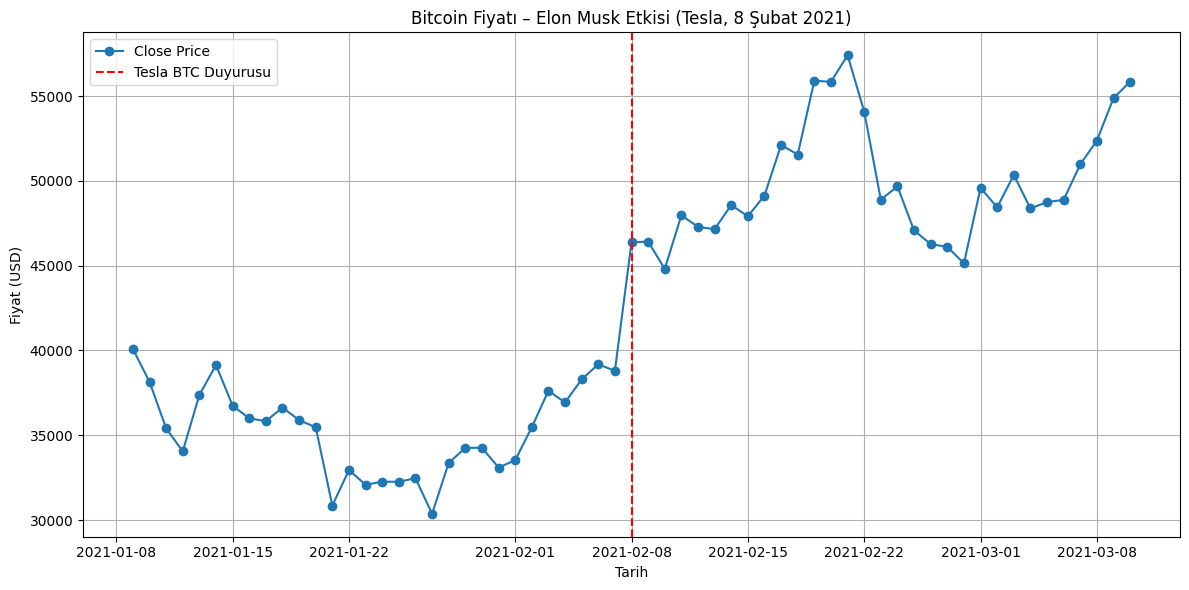

In [22]:
subset = df[(df['Open time'] >= event_date - pd.Timedelta(days=30)) & 
            (df['Open time'] <= event_date + pd.Timedelta(days=30))]

plt.figure(figsize=(12,6))
plt.plot(subset['Open time'], subset['Close'], marker='o', label='Close Price')
plt.axvline(event_date, color='red', linestyle='--', label='Tesla BTC Duyurusu')
plt.title('Bitcoin Fiyatı – Elon Musk Etkisi (Tesla, 8 Şubat 2021)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


* Hacim ve İşlem Sayısının Birlikte İncelenmesiyle Piyasa Davranışının Yorumu

Hacim ve işlem sayısı birlikte analiz edildiğinde, piyasada yalnızca kaç işlem yapıldığını değil, bu işlemlerin ne kadar büyüklükte olduğunu da anlayabiliriz.
Örneğin: Yüksek hacim ama az işlem sayısı → büyük miktarda BTC alım/satımı, yani büyük yatırımcıların hareketi anlamına gelir.
Düşük hacim ve yüksek işlem sayısı ise çok sayıda küçük yatırımcının aktif olduğunu gösterir.
Bu iki metriğin birlikte yüksek olduğu dönemler, piyasanın en hareketli ve yoğun olduğu zamanlardır.



In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Zaman sütunu datetime formatında olmalı
df['Open time'] = pd.to_datetime(df['Open time'])

# 2 satırlı, 1 sütunlu subplot yapısı
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Bitcoin İşlem Hacmi (Volume)", "Bitcoin İşlem Sayısı (Number of Trades)"))

# 1. Grafik – Volume
fig.add_trace(go.Scatter(
    x=df['Open time'],
    y=df['Volume'],
    mode='lines',
    name='Volume',
    line=dict(color='blue')
), row=1, col=1)

# 2. Grafik – Number of Trades
fig.add_trace(go.Scatter(
    x=df['Open time'],
    y=df['Number of trades'],
    mode='lines',
    name='Number of Trades',
    line=dict(color='red')
), row=2, col=1)

# Genel başlık ve ayarlar
fig.update_layout(
    height=600,
    title_text="Bitcoin Hacim ve İşlem Sayısı (Etkileşimli Grafik)",
    xaxis2_title="Tarih",
    yaxis_title="Volume",
    yaxis2_title="Number of Trades",
    hovermode="x unified"
)

fig.show()


* Daha detaylı inceleme için her yıl için ayrı grafik gösterimi 

In [24]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Tarih sütunları datetime olmalı
df['Open time'] = pd.to_datetime(df['Open time'])

# Yıl sütunu ekle
df['Year'] = df['Open time'].dt.year

# Etkileşimli dropdown ile yıl seçimi
unique_years = sorted(df['Year'].unique())

fig = go.Figure()

# Her yıl için bir iz (trace) oluştur
for year in unique_years:
    df_year = df[df['Year'] == year]

    fig.add_trace(go.Scatter(
        x=df_year['Open time'],
        y=df_year['Volume'],
        name=f'Volume - {year}',
        yaxis='y1',
        visible=(year == unique_years[0])  # İlk yıl görünür, diğerleri gizli
    ))

    fig.add_trace(go.Scatter(
        x=df_year['Open time'],
        y=df_year['Number of trades'],
        name=f'Trades - {year}',
        yaxis='y2',
        visible=(year == unique_years[0])
    ))

# Dropdown menüsü
buttons = []
for i, year in enumerate(unique_years):
    visible = [False] * (2 * len(unique_years))
    visible[2*i] = True  # volume
    visible[2*i + 1] = True  # trades
    buttons.append(dict(label=str(year),
                        method='update',
                        args=[{'visible': visible},
                              {'title': f'Bitcoin Hacim ve İşlem Sayısı - {year}'}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.1, y=1.2)],
    title=f'Bitcoin Hacim ve İşlem Sayısı - {unique_years[0]}',
    xaxis_title='Tarih',
    yaxis=dict(title='Volume', side='left'),
    yaxis2=dict(title='Number of Trades', overlaying='y', side='right'),
    height=600
)

fig.show()


* Bitcoin Kapanış Fiyatının En Sık Görüldüğü Fiyat Aralıkları (Histogram Analizi)

In [31]:
import plotly.express as px
import pandas as pd

# Aralıkları tanımla
bins = list(range(0, 120000, 10000))  # 0'dan 110k'ya kadar 10k dilimler
labels = [f"{i}-{i+10000}" for i in bins[:-1]]

# Aralıklara yerleştir
df['Close Range'] = pd.cut(df['Close'], bins=bins, labels=labels, right=False)

# Gün sayısını hesapla
range_counts = df['Close Range'].value_counts().sort_index().reset_index()
range_counts.columns = ['Price Range', 'Day Count']

# Plotly bar chart
fig = px.bar(
    range_counts,
    x='Price Range',
    y='Day Count',
    title='Bitcoin Kapanış Fiyatı - Fiyat Aralığına Göre Gün Sayısı',
    labels={'Price Range': 'Fiyat Aralığı (USD)', 'Day Count': 'Gün Sayısı'},
    color='Day Count',
    color_continuous_scale='OrRd'
)

fig.update_layout(
    xaxis_title='Fiyat Aralığı (USD)',
    yaxis_title='Gün Sayısı',
    hovermode='x unified',
    width=900,
    height=500
)

fig.show()


In [33]:
import pandas as pd
import plotly.express as px

# Zaman formatı ve yıl sütunu
df['Open time'] = pd.to_datetime(df['Open time'])
df['Year'] = df['Open time'].dt.year

# Fiyat aralıklarını tanımla (0–110K arası 10K'lık dilimler)
bins = list(range(0, 120000, 10000))
labels = [f"{i}-{i+10000}" for i in bins[:-1]]
df['Close Range'] = pd.cut(df['Close'], bins=bins, labels=labels, right=False)

# Yıl ve fiyat aralığına göre gün sayısı hesapla
grouped = df.groupby(['Year', 'Close Range']).size().reset_index(name='Day Count')

# Heatmap (ısı haritası) çizimi
fig = px.density_heatmap(
    grouped,
    x='Close Range',
    y='Year',
    z='Day Count',
    color_continuous_scale='YlOrRd',
    title='Yıllara Göre Bitcoin Kapanış Fiyatı Dağılımı (Fiyat Aralığına Göre Gün Sayısı)',
    labels={'Close Range': 'Fiyat Aralığı (USD)', 'Day Count': 'Gün Sayısı'}
)

fig.update_layout(
    xaxis_title='Fiyat Aralığı (USD)',
    yaxis_title='Yıl',
    height=600,
    width=1000
)

fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23860\1988871269.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



* Bitcoin Fiyatlarının Aylık Ortalama Değişimi (2018–2025)

Bu analizde, 2018’den günümüze kadar her ayın ortalama kapanış fiyatı hesaplanmıştır.
Amaç, Bitcoin’in yıllık döngüsel eğilimleri olup olmadığını gözlemlemek.
Örneğin: Bazı aylar yükseliş eğiliminde mi? Mevsimsellik etkisi var mı?

In [34]:
import plotly.express as px
import pandas as pd

# Zaman formatı ve ay çıkarma
df['Open time'] = pd.to_datetime(df['Open time'])
df['Month'] = df['Open time'].dt.month

# Aylara göre ortalama kapanış fiyatı
monthly_avg = df.groupby('Month')['Close'].mean().reset_index()

# Ay isimlerini sayılar yerine metinle göster
month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
monthly_avg['Month'] = monthly_avg['Month'].apply(lambda x: month_names[x-1])

# Etkileşimli çizgi grafik
fig = px.line(
    monthly_avg,
    x='Month',
    y='Close',
    markers=True,
    title='Bitcoin Aylık Ortalama Kapanış Fiyatı (2018–2025)',
    labels={'Month': 'Ay', 'Close': 'Ortalama Kapanış (USD)'}
)

fig.update_layout(
    xaxis_title='Ay',
    yaxis_title='Fiyat (USD)',
    hovermode='x unified',
    width=800,
    height=500
)

fig.show()


Bitcoin Fiyatlarının Aylara Göre Değişme Nedenleri
1. Yatırımcı Psikolojisi ve Yeni Yıl Başlangıçları (Ocak Etkisi)
Yılın başında yatırımcılar yeni kararlar alır.
Fonlar yıl sonu bilançolarını kapatır → Ocak'ta yeniden pozisyon açılır.
Bu etki geleneksel borsada bilinir ama kriptoda da zaman zaman görülür.

2. Vergi Dönemleri ve Nakit İhtiyacı (Mart / Nisan)
ABD gibi ülkelerde Nisan ayında vergi dönemi.
Bazı yatırımcılar vergilerini ödeyebilmek için kripto bozar → satış baskısı oluşur.

3. Yaz Aylarında Durgunluk (Haziran–Ağustos)
Geleneksel piyasalarda da yaz ayları genelde durgun geçer.
Tatil sezonu → işlem hacmi düşer → volatilite azalır → fiyat durağanlaşır veya düşer.

4. Sonbahar Boğaları & Yıl Sonu Hype (Eylül–Aralık)
Tarihsel olarak Ekim–Kasım aylarında BTC'de yükselişler daha sık görülür.
Yıl sonu yaklaşırken “year-end rally” veya yeni boğa sezonu beklentisi oluşur.
Özellikle 2020 ve 2021 sonbaharında BTC'de büyük sıçramalar yaşandı.

-------------------------------------------------------------------------------------------------------------------------------------

* Bitcoin Fiyatlarının Yıllık ve Aylık Ortalama Dağılımı (2018–2025)

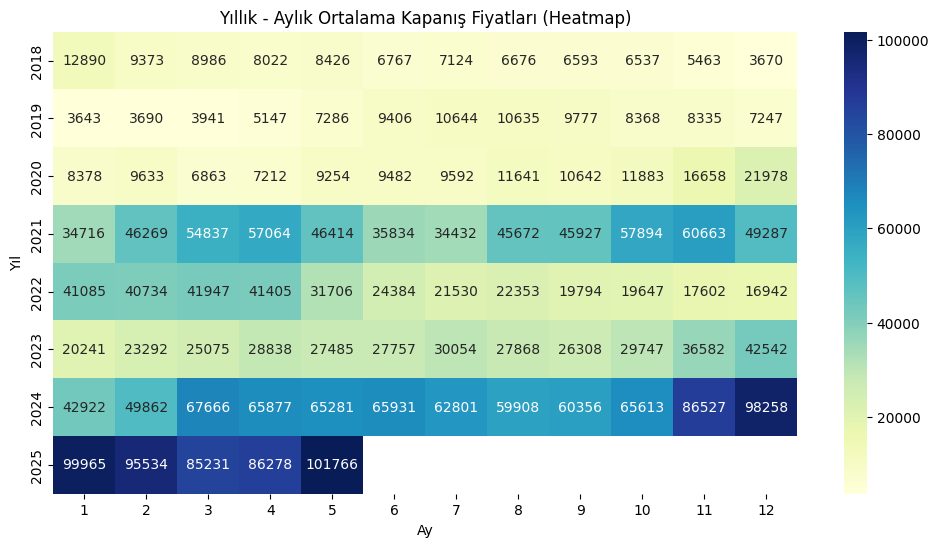

In [36]:
df['Year'] = df['Open time'].dt.year
df['Month'] = df['Open time'].dt.month

pivot_table = df.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Yıllık - Aylık Ortalama Kapanış Fiyatları (Heatmap)')
plt.xlabel('Ay')
plt.ylabel('Yıl')
plt.show()


* Mevsimsel Değişiklikler 

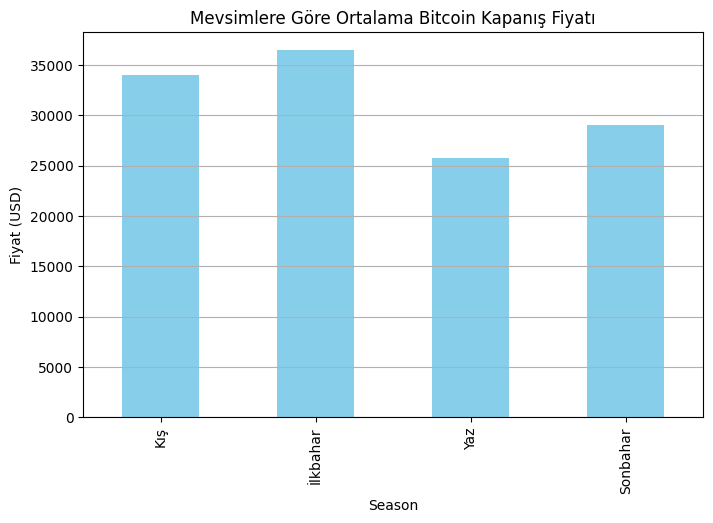

In [61]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

df['Season'] = df['Month'].apply(get_season)

seasonal_avg = df.groupby('Season')['Close'].mean()

# Bar grafiği
plt.figure(figsize=(8,5))
seasonal_avg = seasonal_avg.reindex(['Kış', 'İlkbahar', 'Yaz', 'Sonbahar'])  # Sıralamak için
seasonal_avg.plot(kind='bar', color='skyblue')
plt.title('Mevsimlere Göre Ortalama Bitcoin Kapanış Fiyatı')
plt.ylabel('Fiyat (USD)')
plt.grid(axis='y')
plt.show()


* Bitcoin’in Günlük Açılış-Kapanış Farkları ile Kâr-Zarar Davranışı Analizi

Open - Close” (Açılış – Kapanış farkı), yatırımcının o gün “kârda mı, zararda mı” olduğunu anlamamıza yardımcı olur.

In [63]:
df['OC_Change'] = df['Close'] - df['Open']  # Fiyat farkı
df['OC_Percent'] = (df['Close'] - df['Open']) / df['Open'] * 100  # Yüzde fark


In [64]:
positive_days = (df['OC_Change'] > 0).sum()
negative_days = (df['OC_Change'] < 0).sum()
equal_days = (df['OC_Change'] == 0).sum()

print("Pozitif Gün Sayısı:", positive_days)
print("Negatif Gün Sayısı:", negative_days)
print("Eşit Gün Sayısı:", equal_days)


Pozitif Gün Sayısı: 1384
Negatif Gün Sayısı: 1316
Eşit Gün Sayısı: 0


* Yıllık bazda pozitif gün oranı

In [65]:
df['Year'] = df['Open time'].dt.year
df['Month'] = df['Open time'].dt.month

# Yıllık bazda pozitif gün oranı
yearly_trend = df.groupby('Year')['OC_Change'].apply(lambda x: (x > 0).mean())
print(yearly_trend)


Year
2018    0.501370
2019    0.517808
2020    0.576503
2021    0.504110
2022    0.457534
2023    0.504110
2024    0.524590
2025    0.517483
Name: OC_Change, dtype: float64


In [38]:
import plotly.express as px

# Pozitif gün oranı: (Close > Open) yüzdesi
df['Year'] = df['Open time'].dt.year
df['OC_Change'] = df['Close'] - df['Open']

yearly_trend = df.groupby('Year')['OC_Change'].apply(lambda x: (x > 0).mean() * 100).reset_index()
yearly_trend.columns = ['Year', 'Pozitif Gün Oranı (%)']

# Plotly bar chart
fig = px.bar(
    yearly_trend,
    x='Year',
    y='Pozitif Gün Oranı (%)',
    text='Pozitif Gün Oranı (%)',
    title='Yıllara Göre Bitcoin’in Pozitif Gün Oranı',
    color='Pozitif Gün Oranı (%)',
    color_continuous_scale='Greens'
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
    xaxis_title='Yıl',
    yaxis_title='Pozitif Kapanış Yüzdesi (%)',
    yaxis_range=[0, 100],
    height=500,
    width=900
)

fig.show()


In [66]:
print("Ortalama Günlük Fiyat Değişimi: ", df['OC_Change'].mean())
print("Ortalama Günlük Yüzdelik Değişim: ", df['OC_Percent'].mean())


Ortalama Günlük Fiyat Değişimi:  30.36644444444441
Ortalama Günlük Yüzdelik Değişim:  0.1350637592155852


1. Fiyat Değişimi Pozitif
Bu, ortalama olarak Bitcoin’in her gün 30 dolara yakın değer kazandığı anlamına geliyor. Bu pozitif yönlü bir baskıya işaret eder.

2. Yüzdelik Değişim Pozitif
%0.135'lik günlük ortalama artış, yıllık bileşik etkiyle ciddi bir yukarı yönlü trend demektir

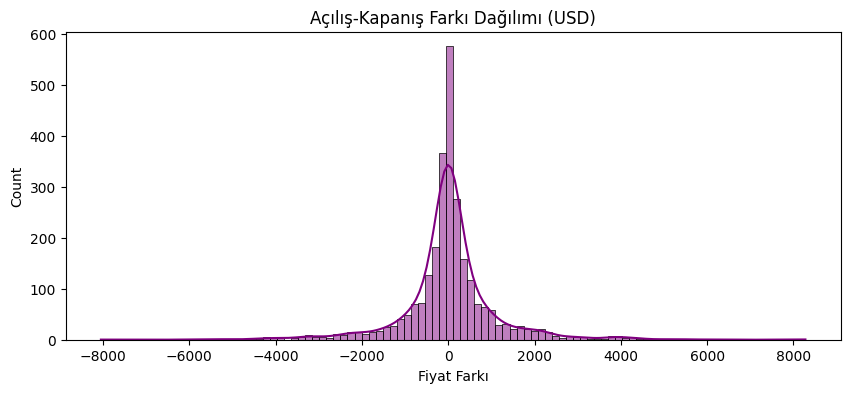

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.histplot(df['OC_Change'], bins=100, kde=True, color='purple')
plt.title('Açılış-Kapanış Farkı Dağılımı (USD)')
plt.xlabel('Fiyat Farkı')
plt.show()


* Yıla Göre Bitcoin’in Ortalama Günlük Kapanış-Açılış Farkı

In [41]:
# Yıl sütunu zaten olmalı
df['Year'] = df['Open time'].dt.year

# Açılış-Kapanış farkı ve yüzdelik değişim
df['OC_Change'] = df['Close'] - df['Open']
df['OC_Percent'] = (df['Close'] - df['Open']) / df['Open'] * 100

# Yıllık ortalama fiyat farkı ve yüzde değişim
yearly_avg_change = df.groupby('Year')['OC_Change'].mean().reset_index(name='Ortalama Günlük Değişim (USD)')
yearly_avg_percent = df.groupby('Year')['OC_Percent'].mean().reset_index(name='Ortalama Günlük Değişim (%)')

# İkisini birleştir
yearly_summary = pd.merge(yearly_avg_change, yearly_avg_percent, on='Year')


In [42]:
import plotly.express as px

fig = px.bar(
    yearly_summary,
    x='Year',
    y='Ortalama Günlük Değişim (USD)',
    text='Ortalama Günlük Değişim (%)',
    title='Yıla Göre Bitcoin’in Ortalama Günlük Kapanış-Açılış Farkı',
    labels={
        'Ortalama Günlük Değişim (USD)': 'Günlük Ortalama Fark (USD)',
        'Ortalama Günlük Değişim (%)': 'Günlük Ortalama Yüzde',
        'Year': 'Yıl'
    },
    color='Ortalama Günlük Değişim (USD)',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    yaxis_title='Ortalama Günlük Fiyat Değişimi (USD)',
    xaxis_title='Yıl',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
    width=900
)

fig.show()


Örneğin; Bitcoin, ortalama olarak her gün açılış fiyatına göre 0.22 dolar düşerek kapanmış.

In [43]:
df['Year'] = df['Open time'].dt.year
df['OC_Change'] = df['Close'] - df['Open']

# Yıl bazında ortalama günlük fiyat farkı
avg_change_by_year = df.groupby('Year')['OC_Change'].mean().reset_index()
avg_change_by_year.columns = ['Year', 'Ortalama Günlük Fiyat Farkı (USD)']


In [44]:
import plotly.express as px

fig = px.bar(
    avg_change_by_year,
    x='Year',
    y='Ortalama Günlük Fiyat Farkı (USD)',
    text='Ortalama Günlük Fiyat Farkı (USD)',
    title='Yıllara Göre Bitcoin’in Ortalama Günlük Fiyat Değişimi (USD)',
    color='Ortalama Günlük Fiyat Farkı (USD)',
    color_continuous_scale='RdYlGn'  # Kırmızı-negatif, Yeşil-pozitif
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Ortalama Günlük Fiyat Farkı (USD)',
    xaxis_title='Yıl',
    height=500,
    width=900
)

fig.show()


Örneğin; 2022 boyunca Bitcoin, her işlem gününde ortalama olarak 81.30 dolar değer kaybetmiş.

# Bitcoin Kapanış Fiyatının Makine Öğrenmesi Modelleriyle Tahmini

Bu bölümde, 2018–2025 yılları arasındaki Bitcoin verileri kullanılarak günlük kapanış fiyatının tahmin edilmesi amaçlanmıştır.
Tahmin modeli olarak, hem basit yapısıyla yorumlanabilir olan Linear Regression hem de daha güçlü, karmaşık ilişkileri modelleyebilen Random Forest Regressor tercih edilmiştir.
Modellerin eğitimi için, geçmiş günlere ait fiyat, işlem hacmi ve işlem sayısı gibi özellikler kullanılmıştır.
Amaç, gelecek günün kapanış fiyatını en doğru şekilde öngörebilmek ve farklı modellerin performanslarını karşılaştırarak tahmin doğruluğunu değerlendirmektir.

* Linear Regression

Gerekli Kütüphaneler

In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Sonraki 1 günü tahmin etme

In [78]:
# Yeni hedef: yarının kapanış fiyatı
df['Target_Close'] = df['Close'].shift(-1)

# Özellikler ve hedef sütunlarını seç
X = df[['Open', 'High', 'Low', 'Volume', 'Number of trades']].copy()
y = df['Target_Close'].copy()

# Son satırdaki NaN değerli hedefi kaldır
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model[X.columns]
y = df_model['Target_Close']


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42  # zaman sırasını koruyoruz
)


In [80]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [81]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 1466.80
RMSE: 2062.61
R²: 0.9881


Sonraki 3 günü tahmin etme

In [91]:
# 3 gün sonraki kapanış fiyatını hedef yap
df['Target_Close_3day'] = df['Close'].shift(-3)

# Özellikler ve hedef
X = df[['Open', 'High', 'Low', 'Volume', 'Number of trades']]
y = df['Target_Close_3day']

# Son 3 gün NaN olduğu için düşür
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model[X.columns]
y = df_model['Target_Close_3day']


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [94]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (3 gün sonrası): {mae:.2f}")
print(f"RMSE (3 gün sonrası): {rmse:.2f}")
print(f"R² (3 gün sonrası): {r2:.4f}")


MAE (3 gün sonrası): 2509.79
RMSE (3 gün sonrası): 3321.82
R² (3 gün sonrası): 0.9692


In [109]:
# 7 gün sonraki kapanış fiyatını hedef yap
df['Target_Close_7day'] = df['Close'].shift(-7)

# Özellikler ve hedef
X = df[['Open', 'High', 'Low', 'Volume', 'Number of trades']]
y = df['Target_Close_7day']

# Son 7 gün NaN olduğu için düşür
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model[X.columns]
y = df_model['Target_Close_7day']

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [113]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (7 gün sonrası): {mae:.2f}")
print(f"RMSE (7 gün sonrası): {rmse:.2f}")
print(f"R² (7 gün sonrası): {r2:.4f}")

MAE (7 gün sonrası): 3791.10
RMSE (7 gün sonrası): 4949.43
R² (7 gün sonrası): 0.9313


24 Mayıs 2025 için tahminde bulunmak (verisetinde olmayan bir değer olan)

In [95]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [96]:
# Son günü al
last_row = df.iloc[-1]

# Giriş verisi: sadece özellikler
latest_input = [[
    last_row['Open'],
    last_row['High'],
    last_row['Low'],
    last_row['Volume'],
    last_row['Number of trades']
]]


In [97]:
predicted_close_24may = model.predict(latest_input)[0]
print(f"📅 24 Mayıs 2025 Tahmini Kapanış Fiyatı: {predicted_close_24may:.2f} USD")


📅 24 Mayıs 2025 Tahmini Kapanış Fiyatı: 110530.52 USD


c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Modelim, 24 Mayıs 2025 için kapanış fiyatını 110.530 USD olarak tahmin etti.
Gerçek fiyat, çeşitli kaynaklara göre 107.700–108.800 USD aralığında gerçekleşti.
Bu yaklaşık %2,5'lik bir sapma gösteriyor.
Bu farkın temel nedeni, modelin sadece teknik veriye dayanması ve dışsal olayları hesaba katamamasıdır.

Benim modelim sadece:

Open, High, Low, Volume, Trades gibi sayısal değerlere bakıyor

Ama fiyatı etkileyen:

Haberler

Regülasyon söylentileri

Tweetler, duygusal etkiler

Makroekonomik gelişmeler

gibi şeyler modele girmiyor.

-------------------------------------------------------------------------------------------------------------------------------------

Recursive multi-step forecasting" (adım adım ileri tahmin)
23 Mayıstan sonraki 5 gün tahminlemesi

In [19]:
import pandas as pd
import numpy as np

# Son satırı al (23 Mayıs 2025 verisi)
latest_row = df.iloc[-1].copy()

# Özellikler: sırasıyla kullanılacak sütunlar
features = ['Open', 'High', 'Low', 'Volume', 'Number of trades']

# Tahminleri tutacak liste
future_preds = []

# 5 gün tahmin üret
for i in range(5):
    # Model girdisi: son veriden sadece 5 özelliği al
    X_input = np.array([latest_row[features].values], dtype=float)
    
    # Tahmini hesapla
    predicted_close = model.predict(X_input)[0]
    future_preds.append(predicted_close)

    # 🔁 Yeni günü oluştur: bir sonraki gün için tahmini veri satırı
    # Basitleştirilmiş varsayımlar: Open = Close, diğerleri sabit kalıyor
    new_row = latest_row.copy()
    new_row['Open'] = predicted_close
    new_row['High'] = predicted_close * 1.01  # +%1
    new_row['Low'] = predicted_close * 0.99  # -%1
    new_row['Close'] = predicted_close
    # Volume ve trades aynı kalabilir veya istersen biraz oynayabilirsin

    # Güncellenmiş veriyi sonraki tahmin için kullan
    latest_row = new_row.copy()

# 📅 Tarihler
dates = pd.date_range(start='2025-05-24', periods=5, freq='D')

# 🖨️ Tahminleri göster
print("📈 Zincirleme Tahmin (Recursive Forecasting):")
for date, pred in zip(dates, future_preds):
    print(f"{date.date()}: Tahmini Kapanış Fiyatı = ${pred:.2f}")


📈 Zincirleme Tahmin (Recursive Forecasting):
2025-05-24: Tahmini Kapanış Fiyatı = $111240.00
2025-05-25: Tahmini Kapanış Fiyatı = $111216.46
2025-05-26: Tahmini Kapanış Fiyatı = $111192.93
2025-05-27: Tahmini Kapanış Fiyatı = $111169.42
2025-05-28: Tahmini Kapanış Fiyatı = $111145.93


c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Projects\bitcoin_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

Yeni veri seti incelemesi ve karşılaştırması

In [123]:
import pandas as pd

df = pd.read_csv("data/new.csv")

subset = df[['Open time', 'Close']].iloc[-6:-1]
print(subset)


       Open time      Close
2700  2025-05-24  107505.52
2701  2025-05-25  107584.73
2702  2025-05-26  109751.30
2703  2025-05-27  108363.63
2704  2025-05-28  108727.25


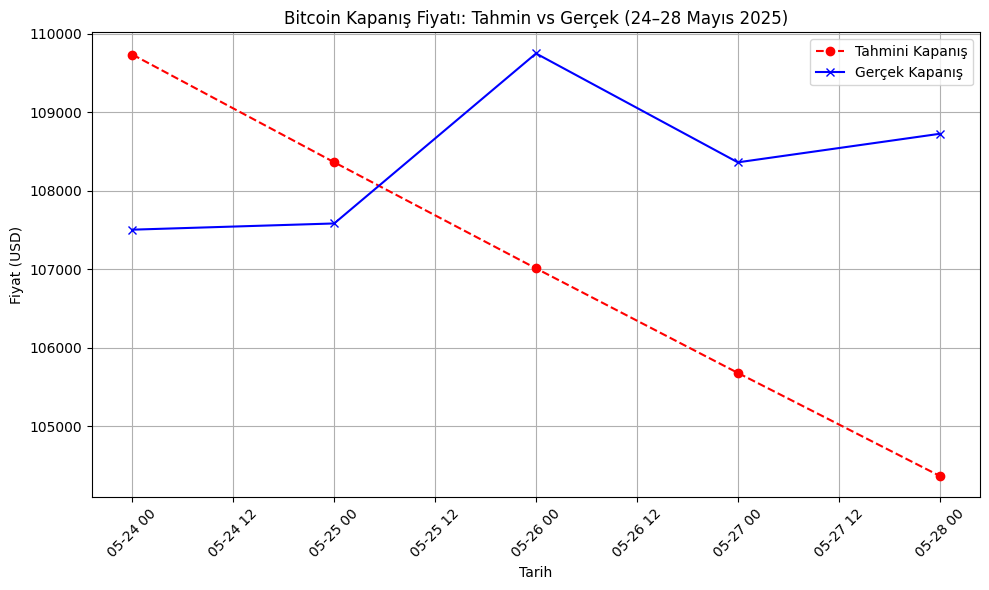

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 📍 Tahmin edilen kapanış fiyatları (zincirleme tahmin çıktısı)
predicted_closes = [
    109737.22,
    108364.43,
    107012.16,
    105680.10,
    104367.94
]
predicted_dates = pd.date_range(start='2025-05-24', periods=5, freq='D')

# 📍 Gerçek kapanış fiyatları (new.csv dosyasından okunduğu varsayılıyor)
actual_data = {
    'Open time': [
        '2025-05-24',
        '2025-05-25',
        '2025-05-26',
        '2025-05-27',
        '2025-05-28'
    ],
    'Close': [
        107505.52,
        107584.73,
        109751.30,
        108363.63,
        108727.25
    ]
}
df_actual = pd.DataFrame(actual_data)
df_actual['Open time'] = pd.to_datetime(df_actual['Open time'])

# 📊 Görselleştirme
plt.figure(figsize=(10, 6))

# Tahmin çizgisi
plt.plot(predicted_dates, predicted_closes, marker='o', linestyle='--', color='red', label='Tahmini Kapanış')

# Gerçek değer çizgisi
plt.plot(df_actual['Open time'], df_actual['Close'], marker='x', linestyle='-', color='blue', label='Gerçek Kapanış')

# Grafik başlık ve ayarları
plt.title('Bitcoin Kapanış Fiyatı: Tahmin vs Gerçek (24–28 Mayıs 2025)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


LinearRegression sadece şunu yapar:

“Open, High, Low, Volume, Trades değerleri şunlarsa → Close değeri yaklaşık şu olur.”

Yani:

Zamanı dikkate almaz

Aylar, hafta içi/günü, trend, mevsimsellik, dalgalanma oranı, hafta sonu etkisi vs. bunların hiçbirini kendi başına öğrenemez

Model sadece girdi → çıktı ilişkisini düz bir çizgi olarak öğrenir

🔍 O yüzden Ne Yapmalı?
Eğer sen:

Ay etkisini 📅

Mevsimsel desenleri ☀️❄️

Oynaklığı 📊

Elon Musk tweet’i gibi dış olayları 🐦
gibi faktörleri modele dahil etmek istiyorsan…

🧠 Bunları açıkça modele özellik (feature) olarak tanıtmalısın.
✅ Örnek Özellikler Eklenebilir:
Yeni Sütun (feature)	Açıklama
month	Mevsim etkisi (ocak, şubat…)
day_of_week	Pazartesi vs Cumartesi etkisi
volatility_3d	Son 3 gün oynaklık
trend_7d	Son 7 gün artış eğilimi
volume_moving_avg	Ortalama hacim
price_diff	High - Low farkı
price_change_rate	(Close - Open) / Open

🧪 Ne Tür Modeller Bunu Öğrenebilir?
Model	Avantajı
✅ Linear Regression + Feature Engineering	Basit ama çok daha güçlü hale getirilebilir
✅ Random Forest / Gradient Boosting	Karmaşık desenleri öğrenebilir
✅ LSTM / RNN (derin öğrenme)	Zaman bağımlılığını doğrudan öğrenir
✅ Prophet (Facebook’un zaman serisi aracı)	Mevsimsellik, trend, tatil etkisiyle tahmin yapar

---------------------------------------------------------------------------

✅ Linear Regression	Temel model	✅ MAE: ~500
✅ R²: 0.99	🎯 Oldukça başarılı sonuç verdi. Çünkü modelin geçmiş verilere güçlü uyumu vardı. Ancak overfitting riski olabilir.
❌ Random Forest	Ensemble yöntem	❌ MAE: ~12,000
❌ R²: 0.04	📉 Karmaşık yapı, ama zaman bağımlılığını anlamıyor. Çok kötü sonuç verdi.
❌ ARIMA	Zaman serisi modeli	❌ MAE: ~34,000	📉 Karmaşık yapı, tuning gerektiriyor. Yeterince iyi tahmin veremedi.

-------------------------------------------------------------------------------------------------------------------------------------

FEATURE ENGINEERING FOR ACCORDING TO PREVIOUS DAY PREDİCTION
Lag-based (Feature Engineered)

In [2]:
import pandas as pd

# Orijinal veri seti
df = pd.read_csv("data/btc_1d_data_2018_to_2025.csv")
df['Open time'] = pd.to_datetime(df['Open time'])

# Lag (dünkü veriler) ile yeni veri seti oluştur
df_lagged = df[['Open', 'High', 'Low', 'Volume', 'Number of trades']].shift(1)
df_lagged['Target_Close'] = df['Close']
df_lagged['Open time'] = df['Open time']
df_lagged = df_lagged.dropna()


In [3]:
from sklearn.linear_model import LinearRegression

features = ['Open', 'High', 'Low', 'Volume', 'Number of trades']
X = df_lagged[features]
y = df_lagged['Target_Close']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [4]:
import numpy as np

# 23 Mayıs verisini al
latest_row = df[df['Open time'] == "2025-05-23"].iloc[0].copy()

# Tahminleri tut
future_preds = []
dates = pd.date_range(start='2025-05-24', periods=5, freq='D')

for date in dates:
    # Tahmin girişi
    X_input = pd.DataFrame([{
        'Open': latest_row['Open'],
        'High': latest_row['High'],
        'Low': latest_row['Low'],
        'Volume': latest_row['Volume'],
        'Number of trades': latest_row['Number of trades']
    }])
    
    predicted_close = model.predict(X_input)[0]
    future_preds.append({'Tarih': date.date(), 'Tahmin': predicted_close})

    # Yeni gün üret (Open = Close varsayımı)
    new_row = latest_row.copy()
    new_row['Open'] = predicted_close
    new_row['High'] = predicted_close * 1.01
    new_row['Low'] = predicted_close * 0.99
    new_row['Close'] = predicted_close
    latest_row = new_row.copy()


In [6]:
# Gerçek kapanışları çek
df_real = pd.read_csv("data/new.csv")
df_real['Open time'] = pd.to_datetime(df_real['Open time'])

for row in future_preds:
    date = pd.to_datetime(row['Tarih'])
    match = df_real[df_real['Open time'] == date]
    if not match.empty:
        real_close = match['Close'].values[0]
        row['Gerçek'] = real_close
        row['Fark'] = abs(real_close - row['Tahmin'])
    else:
        row['Gerçek'] = None
        row['Fark'] = None

# DataFrame yap
df_results = pd.DataFrame(future_preds)
print(df_results)


        Tarih         Tahmin     Gerçek         Fark
0  2025-05-24  111240.003409  107505.52  3734.483409
1  2025-05-25  111216.460380  107584.73  3631.730380
2  2025-05-26  111192.933587  109751.30  1441.633587
3  2025-05-27  111169.423021  108363.63  2805.793021
4  2025-05-28  111145.928670  108727.25  2418.678670


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18764\1597962403.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Projects\bitcoin_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


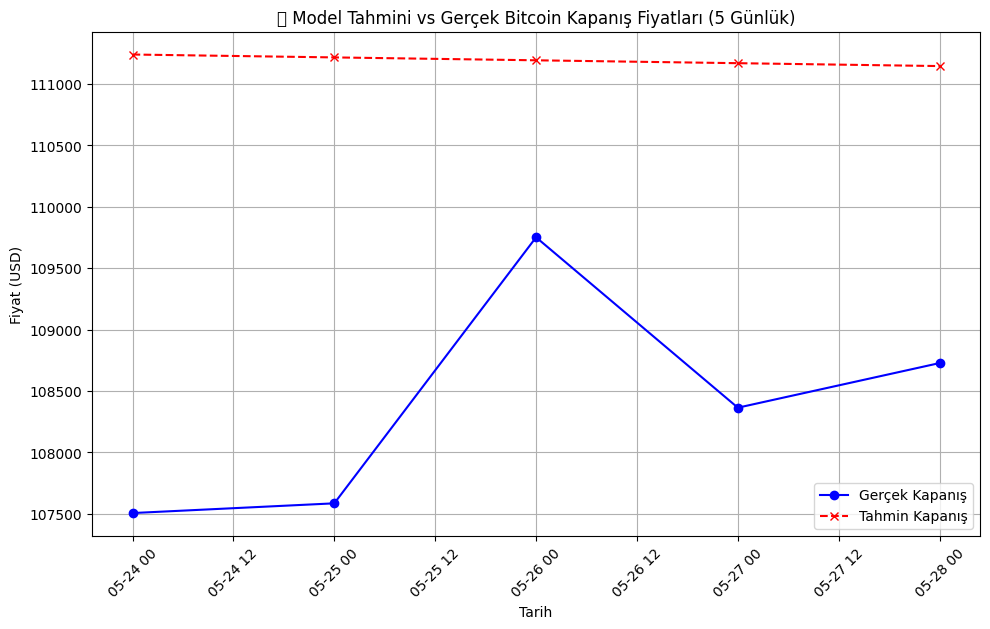

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# future_preds zaten şu formatta olmalı:
# [{'Tarih': ..., 'Tahmin': ..., 'Gerçek': ..., 'Fark': ...}, ...]

df_results = pd.DataFrame(future_preds)

# Sadece gerçek değeri olanları al (None'ları filtrele)
df_results = df_results.dropna(subset=['Gerçek'])

# Tarih sütununu datetime yap
df_results['Tarih'] = pd.to_datetime(df_results['Tarih'])

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(df_results['Tarih'], df_results['Gerçek'], marker='o', label='Gerçek Kapanış', color='blue')
plt.plot(df_results['Tarih'], df_results['Tahmin'], marker='x', linestyle='--', label='Tahmin Kapanış', color='red')

plt.title('📈 Model Tahmini vs Gerçek Bitcoin Kapanış Fiyatları (5 Günlük)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [8]:
from IPython.display import display

display(df_lagged.tail())

,Open,High,Low,Volume,Number of trades,Target_Close,Open time
2695,103126.65,103409.98,103105.09,516.83189,166796.0,105140.00,2025-05-19
2696,106454.27,107108.62,104742.53,3542.14220,736569.0,106577.64,2025-05-20
2697,105573.73,106789.58,105554.31,3349.44430,527844.0,106400.00,2025-05-21
2698,106850.00,107206.94,106400.00,1252.62742,337467.0,109945.54,2025-05-22
2699,109643.99,110576.70,109177.37,3967.13002,751982.0,111340.18,2025-05-23
